<a href="https://colab.research.google.com/github/gracesjy/handsonml2/blob/main/3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 분류

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)


## MNIST


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
type(mnist.target)

numpy.ndarray

In [13]:
import _pickle as cPickle
mnist_data = cPickle.dumps(mnist.data)
mnist_label = cPickle.dumps(mnist.target)

In [ ]:
# 아래는 byte 가 된다.
d5 = cPickle.dumps(b)

# 이제 저장한다.
import cx_Oracle
conn = cx_Oracle.connect('rquser', 'nebula', 'FREE')
cursor=conn.cursor()
binary_data = cursor.var(cx_Oracle.BLOB)
binary_label = cursor.var(cx_Oracle.BLOB)

binary_data.setvalue(0, mnist_data)
binary_label.setValue(0, mnist_label)

cursor.execute("INSERT INTO IMAGE_DATA(KEY, DATA, LABEL) VALUES(:1,:2,:3)",
       ['mnist',binary_data,binary_label])

conn.commit()

In [8]:
xx = cPickle.loads(d5)
xx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

```sql
 SELECT *
      FROM table(apTableEval(
         	cursor(SELECT * FROM IMAGE_DATA WHERE key='mnist'),
         	NULL,
          'SELECT 1 ID, CAST(''A'' AS VARCHAR2(40)) NAME,
           	CAST(''A'' AS VARCHAR2(40)) CLASS FROM DUAL',      
           'apTableTest:deserialize'));
```

```python
def deserialize(df):
   data = df['DATA']
   mnist_data = cPickle.loads(data[0])
   label = df['LABEL']
   mnist_label = cPickle.loads(label[0])
   
   return pdf;
```

In [9]:
X,y = xx, mnist.target

In [ ]:
X,y = mnist.data, mnist.target
X.shape

(70000, 784)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
  plt.show()

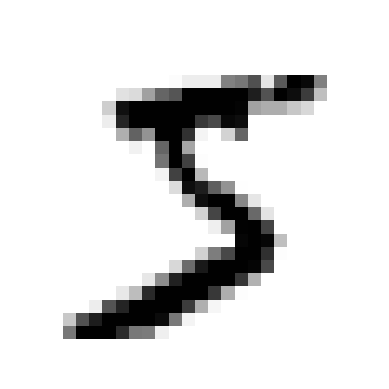

In [12]:
some_digit = X[0]
plot_digit(some_digit)

In [ ]:
y[0]

'5'

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == '5')  # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
some_digit = X[0]
result = sgd_clf.predict([some_digit])

In [20]:
type(result)

numpy.ndarray

In [22]:
result_array = result.tolist()
result_array

[True]

In [25]:
ret_arr = []
for x in result_array:
  if x == True:
    ret_arr.append(1)
  else:
    ret_arr.append(0)

ret_arr

[1]

In [26]:
import pandas as pd

type(ret_arr[0] )
df = pd.DataFrame(ret_arr, columns=['result'])
df

,result
0,1
